Regression Lab Assignement in Data Mining

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
import sklearn.metrics as sm
from sklearn.preprocessing import PolynomialFeatures

# Linear Regression Model Analysis

For this first part, no coding was required. Answers are found in the analytical report

# Data Generation and Model Fitting


## First Data Generation

In [2]:
seed = 42
np.random.seed(seed)
x = np.random.normal(loc=0.0, scale=np.sqrt(1.0), size=100) #loc = mean, scale -> Variance
x.sort()
eps = np.random.normal(loc=0.0, scale=np.sqrt(0.25), size=100)

#build model : 
y1 = -0.5 + 0.75*x + eps

len(y1) #the length of the vector y

100

In [3]:
#help(np.random.normal)

values of beta_0 and beta_1 are -0.5 and 0.75 respectively.

## First Data Visualization

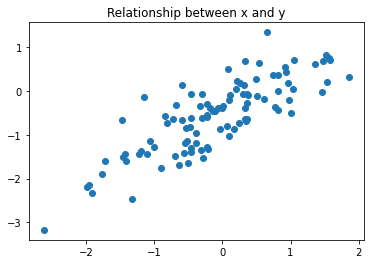

In [4]:
plt.scatter(x,y1)
plt.title('Relationship between x and y')

#saving plot: 
plt.savefig('1st Data Vis.PNG')

In [5]:
#help(matplotlib.pyplot)

## Fitting First Linear Regression

True values of coeffients: beta_0 = -0.500, beta_1 = 0.750
Estimation values of coeffients: beta_hat_0 = -0.488, beta_hat_1 = 0.757
r² statsitic = 0.6750536311635917


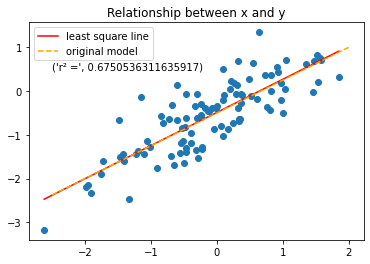

In [6]:
### (a) How do the estimations of β_hat_0 and β_hat_1 compare to β0 and β1 ?

#first build linear regression model: 
lr = LinearRegression()
x_2D = x.reshape(-1,1)
lr.fit(x_2D, y1) #-> changed after this error: ValueError: Expected 2D array, got 1D array instead

#true values of beta1 and beta0
beta_0 = -0.5
beta_1 = 0.75

print("True values of coeffients: beta_0 = {:.3f}, beta_1 = {:.3f}".format(beta_0, beta_1))

#estimation values: 
beta_hat_0 = lr.intercept_
beta_hat_1 = lr.coef_[0]

print("Estimation values of coeffients: beta_hat_0 = {:.3f}, beta_hat_1 = {:.3f}".format(beta_hat_0, beta_hat_1))


###(b) Display the least squares line on the scatterplot obtained in Subsection 2.2.

# first replot the scatter plot and o the least square line
plt.scatter(x,y1)
plt.title('Relationship between x and y')

#add least square line: 
plt.plot(x, lr.predict(x_2D), color = 'r', label = 'least square line')

#compare to original model: 
orig_x = np.linspace(-2.5, 2)
orig_y = -0.5 + 0.75*orig_x
plt.plot(orig_x, orig_y, color = 'orange', linestyle = '--',  label = 'original model')
plt.legend()

###(c) Compute R2 statistics
r2 = sm.r2_score(y1, lr.predict(x_2D))
print("r² statsitic =", r2)
plt.text(-2.5, .5, ('r² =',  r2))

#saving plot: 
plt.savefig('first fitting.PNG')

In [7]:
# help(np.linspace)

## Fitting Second Linear Regression

Beta_hat_2 as value:  -0.07284613154960011
True values of coeffients: beta_0 = -0.500, beta_1 = 0.750
Estimation values of coeffients: beta_hat_0 = -0.431, beta_hat_1 = 0.730
r² statsitic = 0.6843191298797681


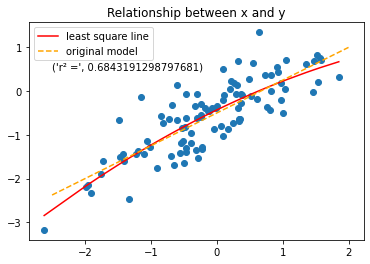

In [8]:
### (a) What is the estimated value for β hat 2?
# first need to create the polynomial regression model: (according to cheat sheet sci-kit learn)
poly = PolynomialFeatures(2, include_bias = False)
x_poly = poly.fit_transform(x_2D)

# now fit this polynomial model the same way as in 2.3:
lr_poly = LinearRegression()
lr_poly.fit(x_poly, y1)

# find beta_hat_2 
beta_hat_2 = lr_poly.coef_[1]

print("Beta_hat_2 as value: ", beta_hat_2)

### (b) How do the estimations of βˆ0 and βˆ1 compare to β0 and β1 ?

## repeat what was done in 2.3 but with this new polynomial model: 
#true values of beta1 and beta0
beta_0 = -0.5
beta_1 = 0.75

print("True values of coeffients: beta_0 = {:.3f}, beta_1 = {:.3f}".format(beta_0, beta_1))

#estimation values: 
beta_hat_0 = lr_poly.intercept_
beta_hat_1 = lr_poly.coef_[0]

print("Estimation values of coeffients: beta_hat_0 = {:.3f}, beta_hat_1 = {:.3f}".format(beta_hat_0, beta_hat_1))

### (b) Display the least squares line on the scatterplot obtained in Subsection2.2.
## again repeat: 
# first replot the scatter plot and o the least square line
plt.scatter(x,y1)
plt.title('Relationship between x and y')
#add least square line: 
y_poly_predicted = lr_poly.predict(x_poly)
plt.plot(x, y_poly_predicted, color = 'r', label = 'least square line')
#compare to original model: 
orig_x = np.linspace(-2.5, 2)
orig_y = -0.5 + 0.75*orig_x
plt.plot(orig_x, orig_y, color = 'orange', linestyle = '--',  label = 'original model')
plt.legend()

### (d) Compute R2 statistics.
r2 = sm.r2_score(y1, lr_poly.predict(x_poly) )
print("r² statsitic =", r2)
plt.text(-2.5, .5, ('r² =',  r2))

#saving plot: 
plt.savefig('second fitting.PNG')

### (e) Is there evidence that the quadratic term improves the model fit? Explain your answer
#-> Yes we can observe that r² is higher (indeed, we improved only as it couldnt be less good only equal because we kept the same and just added some precision with the x² term)

## Second Data Generation

In [9]:
seed = 42
np.random.seed(seed)
x = np.random.normal(loc=0.0, scale=np.sqrt(1.0), size=100) #loc = mean, scale -> Variance
x.sort()
eps = np.random.normal(loc=0.0, scale=np.sqrt(0.25), size=100)

#generate new vector y for the second data geneeration
y2 = -0.5 + 0.75*x + x**2 + eps

## Second Data Visualization

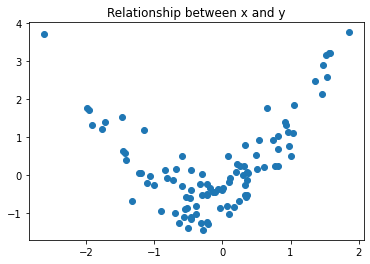

In [10]:
plt.scatter(x,y2)
plt.title('Relationship between x and y')

#saving plot: 
plt.savefig('second visu.PNG')

## Fitting Third Linear Regression

basically a copy paste from section 2.3 with necessary changes

True values of coeffients: beta_0 = -0.500, beta_1 = 0.750
Estimation values of coeffients: beta_hat_0 = 0.301, beta_hat_1 = 0.391
r² statsitic = 0.09010844852869493


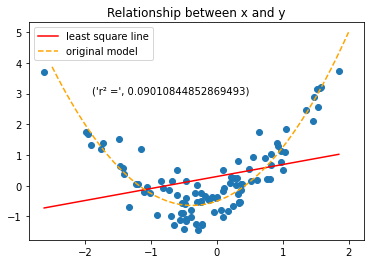

In [11]:
#first build linear regression model: 
lr = LinearRegression()
x_2D = x.reshape(-1,1)
lr.fit(x_2D, y2) #-> changed after this error: ValueError: Expected 2D array, got 1D array instead

#true values of beta1 and beta0
beta_0 = -0.5
beta_1 = 0.75

print("True values of coeffients: beta_0 = {:.3f}, beta_1 = {:.3f}".format(beta_0, beta_1))

#estimation values: 
beta_hat_0 = lr.intercept_
beta_hat_1 = lr.coef_[0]

print("Estimation values of coeffients: beta_hat_0 = {:.3f}, beta_hat_1 = {:.3f}".format(beta_hat_0, beta_hat_1))


###(b) Display the least squares line on the scatterplot obtained in Subsection 2.2.

# first replot the scatter plot and o the least square line
plt.scatter(x,y2)
plt.title('Relationship between x and y')
#add least square line: 
plt.plot(x, lr.predict(x_2D), color = 'r', label = 'least square line')
#compare to original model: 
orig_x = np.linspace(-2.5, 2)
orig_y = -0.5 + 0.75*orig_x + orig_x**2
plt.plot(orig_x, orig_y, color = 'orange', linestyle = '--',  label = 'original model')
plt.legend()

###(c) Compute R2 statistics
r2 = sm.r2_score(y2, lr.predict(x_2D))
print("r² statsitic =", r2)
plt.text(-1.9, 3, ('r² =',  r2))

#saving plot: 
plt.savefig('third fitting.PNG')

## Fitting Fourth Linear Regression

True values of coeffients: beta_0 = -0.500, beta_1 = 0.750, beta_2 = 1.000
Estimation values of coeffients: beta_hat_0 = -0.431, beta_hat_1 = 0.730, beta_hat_2 = 0.927
r² statsitic = 0.8418836385158995


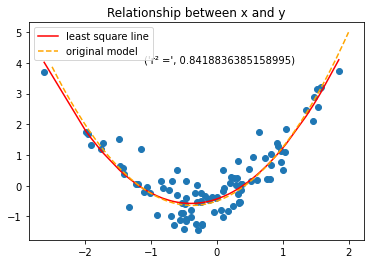

In [12]:
### (a) How do the estimations of β_hat_0 and β_hat_1 compare to β0 and β1 ?

#first build linear regression model: 
lr = LinearRegression()
x_2D = np.column_stack((x, x**2)) #reshaped for 2nd degree regression
lr.fit(x_2D, y2)

#true values of beta1 and beta0
beta_0 = -0.5
beta_1 = 0.75
beta_2 = 1

print("True values of coeffients: beta_0 = {:.3f}, beta_1 = {:.3f}, beta_2 = {:.3f}".format(beta_0, beta_1, beta_2))

#estimation values: 
beta_hat_0 = lr.intercept_
beta_hat_1 = lr.coef_[0]
beta_hat_2 = lr.coef_[1]

print("Estimation values of coeffients: beta_hat_0 = {:.3f}, beta_hat_1 = {:.3f}, beta_hat_2 = {:.3f}".format(beta_hat_0, beta_hat_1, beta_hat_2))

###(b) Display the least squares line on the scatterplot obtained in Subsection 2.6.

# first replot the scatter plot
plt.scatter(x,y2)
plt.title('Relationship between x and y')
#add least square line: 
plt.plot(x, lr.predict(x_2D), color = 'r', label = 'least square line')
#compare to original model: 
orig_x = np.linspace(-2.5, 2)
orig_y = -0.5 + 0.75*orig_x + orig_x**2
plt.plot(orig_x, orig_y, color = 'orange', linestyle = '--',  label = 'original model')
plt.legend()

###(c) Compute R2 statistics
r2 = sm.r2_score(y2, lr.predict(x_2D))
print("r² statsitic =", r2)
plt.text(-1.1, 4, ('r² =',  r2))

#saving plot: 
plt.savefig('fourth fitting.PNG')

####(d) Is there evidence that the quadratic term improves the model fit? Explain your answer.
# -> Yes obviously...

# LASSO Regression Model Analysis

Basically the exact same operations but using LASSO Regression rather than LinearRegression

## First Data Generation

In [13]:
seed = 42
np.random.seed(seed)
x = np.random.normal(loc=0.0, scale=np.sqrt(1.0), size=100) #loc = mean, scale -> Variance
x.sort()
eps = np.random.normal(loc=0.0, scale=np.sqrt(0.25), size=100)

#build model : 
y1 = -0.5 + 0.75*x + eps



## Fitting First Linear Regression

True values of coeffients: beta_0 = -0.500, beta_1 = 0.750
Estimation values of coeffients: beta_hat_0 = -0.567, beta_hat_1 = 0.000
r² statsitic = 0.0


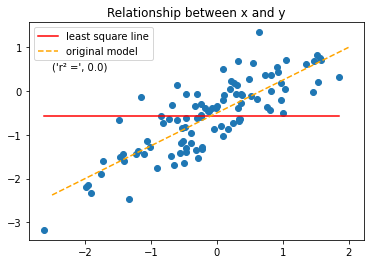

In [14]:
### (a) How do the estimations of β_hat_0 and β_hat_1 compare to β0 and β1 ?


#first build LASSO regression model: 
lr = Lasso() #need to choose alpha accordingly --> none was chosen here
x_2D = x.reshape(-1,1)
lr.fit(x_2D, y1) 

#true values of beta1 and beta0
beta_0 = -0.5
beta_1 = 0.75

print("True values of coeffients: beta_0 = {:.3f}, beta_1 = {:.3f}".format(beta_0, beta_1))

#estimation values: 
beta_hat_0 = lr.intercept_
beta_hat_1 = lr.coef_[0]

print("Estimation values of coeffients: beta_hat_0 = {:.3f}, beta_hat_1 = {:.3f}".format(beta_hat_0, beta_hat_1))


###(b) Display the least squares line on the scatterplot obtained in Subsection 2.2.

# first replot the scatter plot and o the least square line
plt.scatter(x,y1)
plt.title('Relationship between x and y')
#add least square line: 
plt.plot(x, lr.predict(x_2D), color = 'r', label = 'least square line')
#compare to original model: 
orig_x = np.linspace(-2.5, 2)
orig_y = -0.5 + 0.75*orig_x
plt.plot(orig_x, orig_y, color = 'orange', linestyle = '--',  label = 'original model')
plt.legend()

###(c) Compute R2 statistics
r2 = sm.r2_score(y1, lr.predict(x_2D))
print("r² statsitic =", r2)
plt.text(-2.5, .5, ('r² =',  r2))

#saving plot: 
plt.savefig('linear LASSO 1.PNG')

## Fitting Second Linear Regression

Beta_hat_2 as value:  -0.0
True values of coeffients: beta_0 = -0.500, beta_1 = 0.750
Estimation values of coeffients: beta_hat_0 = -0.567, beta_hat_1 = 0.000
r² statsitic = 0.0


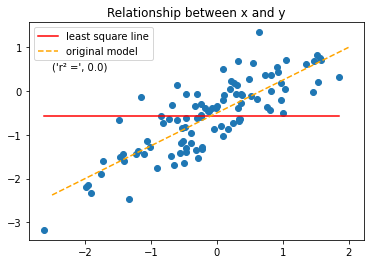

In [15]:
### (a) What is the estimated value for β hat 2?
# first need to create the polynomial regression model: (according to cheat sheet sci-kit learn)
poly = PolynomialFeatures(2, include_bias = False)
x_poly = poly.fit_transform(x_2D)

# now fit this polynomial model the same way as in 2.3:
lr_poly = Lasso()
lr_poly.fit(x_poly, y1)

# find beta_hat_2 
beta_hat_2 = lr_poly.coef_[1]

print("Beta_hat_2 as value: ", beta_hat_2)

### (b) How do the estimations of βˆ0 and βˆ1 compare to β0 and β1 ?

## repeat what was done in 2.3 but with this new polynomial model: 
#true values of beta1 and beta0
beta_0 = -0.5
beta_1 = 0.75

print("True values of coeffients: beta_0 = {:.3f}, beta_1 = {:.3f}".format(beta_0, beta_1))

#estimation values: 
beta_hat_0 = lr_poly.intercept_
beta_hat_1 = lr_poly.coef_[0]

print("Estimation values of coeffients: beta_hat_0 = {:.3f}, beta_hat_1 = {:.3f}".format(beta_hat_0, beta_hat_1))

### (b) Display the least squares line on the scatterplot obtained in Subsection2.2.
## again repeat: 
# first replot the scatter plot and o the least square line
plt.scatter(x,y1)
plt.title('Relationship between x and y')
#add least square line: 
y_poly_predicted = lr_poly.predict(x_poly)
plt.plot(x, y_poly_predicted, color = 'r', label = 'least square line')
#compare to original model: 
orig_x = np.linspace(-2.5, 2)
orig_y = -0.5 + 0.75*orig_x
plt.plot(orig_x, orig_y, color = 'orange', linestyle = '--',  label = 'original model')
plt.legend()

### (d) Compute R2 statistics.
r2 = sm.r2_score(y1, lr_poly.predict(x_poly) )
print("r² statsitic =", r2)
plt.text(-2.5, .5, ('r² =',  r2))

#saving plot: 
plt.savefig('linear LASSO 2.PNG')

### (e) Is there evidence that the quadratic term improves the model fit? Explain your answer
#Here, due to LASSO - NO

## Second Data Generation

In [16]:
seed = 42
np.random.seed(seed)
x = np.random.normal(loc=0.0, scale=np.sqrt(1.0), size=100) #loc = mean, scale -> Variance
x.sort()
eps = np.random.normal(loc=0.0, scale=np.sqrt(0.25), size=100)

#generate new vector y for the second data geneeration
y2 = -0.5 + 0.75*x + x**2 + eps

## Fitting Third Linear Regression


True values of coeffients: beta_0 = -0.500, beta_1 = 0.750
Estimation values of coeffients: beta_hat_0 = 0.261, beta_hat_1 = 0.000
r² statsitic = 0.0


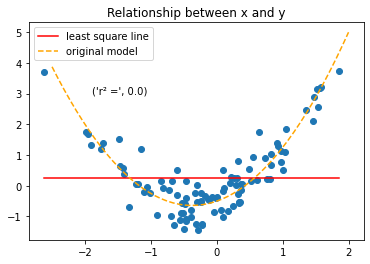

In [17]:
#first build LASSO regression model: 
lr = Lasso()
x_2D = x.reshape(-1,1)
lr.fit(x_2D, y2) #-> changed after this error: ValueError: Expected 2D array, got 1D array instead

#true values of beta1 and beta0
beta_0 = -0.5
beta_1 = 0.75

print("True values of coeffients: beta_0 = {:.3f}, beta_1 = {:.3f}".format(beta_0, beta_1))

#estimation values: 
beta_hat_0 = lr.intercept_
beta_hat_1 = lr.coef_[0]

print("Estimation values of coeffients: beta_hat_0 = {:.3f}, beta_hat_1 = {:.3f}".format(beta_hat_0, beta_hat_1))


###(b) Display the least squares line on the scatterplot obtained in Subsection 2.2.

# first replot the scatter plot and o the least square line
plt.scatter(x,y2)
plt.title('Relationship between x and y')
#add least square line: 
plt.plot(x, lr.predict(x_2D), color = 'r', label = 'least square line')
#compare to original model: 
orig_x = np.linspace(-2.5, 2)
orig_y = -0.5 + 0.75*orig_x + orig_x**2
plt.plot(orig_x, orig_y, color = 'orange', linestyle = '--',  label = 'original model')
plt.legend()

###(c) Compute R2 statistics
r2 = sm.r2_score(y2, lr.predict(x_2D))
print("r² statsitic =", r2)
plt.text(-1.9, 3, ('r² =',  r2))

#saving plot: 
plt.savefig('quad LASSO 1.PNG')

## Fitting Fourth Linear Regression

True values of coeffients: beta_0 = -0.500, beta_1 = 0.750, beta_2 = 1.000
Estimation values of coeffients: beta_hat_0 = 0.258, beta_hat_1 = 0.000, beta_hat_2 = 0.003
r² statsitic = 0.004911661564924841


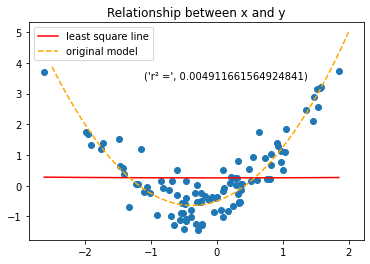

In [18]:
### (a) How do the estimations of β_hat_0 and β_hat_1 compare to β0 and β1 ?
#first build linear regression model: 
lr = Lasso()
x_2D = np.column_stack((x, x**2)) #reshaped for 2nd degree regression
lr.fit(x_2D, y2)

#true values of beta1 and beta0
beta_0 = -0.5
beta_1 = 0.75
beta_2 = 1

print("True values of coeffients: beta_0 = {:.3f}, beta_1 = {:.3f}, beta_2 = {:.3f}".format(beta_0, beta_1, beta_2))

#estimation values: 
beta_hat_0 = lr.intercept_
beta_hat_1 = lr.coef_[0]
beta_hat_2 = lr.coef_[1]

print("Estimation values of coeffients: beta_hat_0 = {:.3f}, beta_hat_1 = {:.3f}, beta_hat_2 = {:.3f}".format(beta_hat_0, beta_hat_1, beta_hat_2))

###(b) Display the least squares line on the scatterplot obtained in Subsection 2.6.

# first replot the scatter plot
plt.scatter(x,y2)
plt.title('Relationship between x and y')
#add least square line: 
plt.plot(x, lr.predict(x_2D), color = 'r', label = 'least square line')
#compare to original model: 
orig_x = np.linspace(-2.5, 2)
orig_y = -0.5 + 0.75*orig_x + orig_x**2
plt.plot(orig_x, orig_y, color = 'orange', linestyle = '--',  label = 'original model')
plt.legend()

###(c) Compute R2 statistics
r2 = sm.r2_score(y2, lr.predict(x_2D))
print("r² statsitic =", r2)
plt.text(-1.1, 3.5, ('r² =',  r2))

#saving plot: 
plt.savefig('quad LASSO 2.PNG')


####(d) Is there evidence that the quadratic term improves the model fit? Explain your answer.
# still not

# Additional Testings:

    Lasso does not work here because it eleminates all features but as we can see here under, choosing alpha accordingly, it works better as shown here under

## Linear: 

### Alpha = 0.1

r² statsitic = 0.6573711130623162


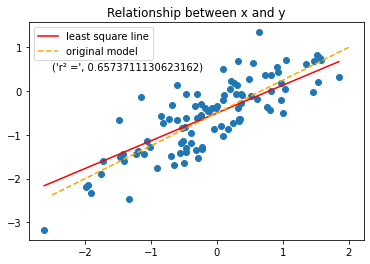

In [19]:
#Repeating most of it but choosing a smaller alpha:
lr = Lasso(alpha = 0.1) 
x_2D = x.reshape(-1,1)
lr.fit(x_2D, y1)

# first replot the scatter plot and the least square line
plt.scatter(x,y1)
plt.title('Relationship between x and y')
#add least square line: 
plt.plot(x, lr.predict(x_2D), color = 'r', label = 'least square line')
#compare to original model: 
orig_x = np.linspace(-2.5, 2)
orig_y = -0.5 + 0.75*orig_x
plt.plot(orig_x, orig_y, color = 'orange', linestyle = '--',  label = 'original model')
plt.legend()

###(c) Compute R2 statistics
r2 = sm.r2_score(y1, lr.predict(x_2D))
print("r² statsitic =", r2)
plt.text(-2.5, .5, ('r² =',  r2))

#saving plot: 
plt.savefig('linear LASSO 0,1.PNG')

### Alpha = 0.01

Again, if we lower alpha, we can see it improves even better:

r² statsitic = 0.6748768059825789


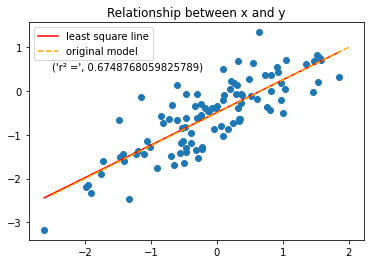

In [20]:
#Repeating most of it but choosing a smaller alpha:
lr = Lasso(alpha = 0.01) #-> ALPHA + O.01
x_2D = x.reshape(-1,1)
lr.fit(x_2D, y1)

# first replot the scatter plot and the least square line
plt.scatter(x,y1)
plt.title('Relationship between x and y')
#add least square line: 
plt.plot(x, lr.predict(x_2D), color = 'r', label = 'least square line')
#compare to original model: 
orig_x = np.linspace(-2.5, 2)
orig_y = -0.5 + 0.75*orig_x
plt.plot(orig_x, orig_y, color = 'orange', linestyle = '--',  label = 'original model')
plt.legend()

###(c) Compute R2 statistics
r2 = sm.r2_score(y1, lr.predict(x_2D))
print("r² statsitic =", r2)
plt.text(-2.5, .5, ('r² =',  r2))

#saving plot: 
plt.savefig('linear LASSO 0,01.PNG')

## Quadratic: 

### Alpha = 0.1

Now, let's repeat both with quadratic model: 

r² statsitic = 0.8218673004363248


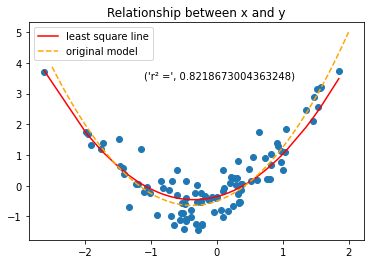

In [21]:
lr = Lasso(alpha = 0.1)
x_2D = np.column_stack((x, x**2)) #reshaped for 2nd degree regression
lr.fit(x_2D, y2)

# first replot the scatter plot
plt.scatter(x,y2)
plt.title('Relationship between x and y')
#add least square line: 
plt.plot(x, lr.predict(x_2D), color = 'r', label = 'least square line')
#compare to original model: 
orig_x = np.linspace(-2.5, 2)
orig_y = -0.5 + 0.75*orig_x + orig_x**2
plt.plot(orig_x, orig_y, color = 'orange', linestyle = '--',  label = 'original model')
plt.legend()

###(c) Compute R2 statistics
r2 = sm.r2_score(y2, lr.predict(x_2D))
print("r² statsitic =", r2)
plt.text(-1.1, 3.5, ('r² =',  r2))

#saving plot: 
plt.savefig('quad LASSO 0,1.PNG')

### Alpha = 0.01

r² statsitic = 0.841683453823373


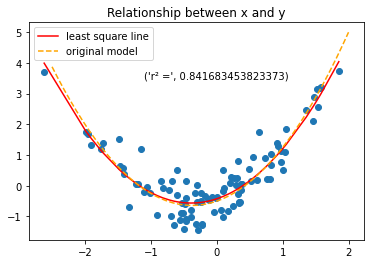

In [22]:
lr = Lasso(alpha = 0.01)
x_2D = np.column_stack((x, x**2)) #reshaped for 2nd degree regression
lr.fit(x_2D, y2)

# first replot the scatter plot
plt.scatter(x,y2)
plt.title('Relationship between x and y')
#add least square line: 
plt.plot(x, lr.predict(x_2D), color = 'r', label = 'least square line')
#compare to original model: 
orig_x = np.linspace(-2.5, 2)
orig_y = -0.5 + 0.75*orig_x + orig_x**2
plt.plot(orig_x, orig_y, color = 'orange', linestyle = '--',  label = 'original model')
plt.legend()

###(c) Compute R2 statistics
r2 = sm.r2_score(y2, lr.predict(x_2D))
print("r² statsitic =", r2)
plt.text(-1.1, 3.5, ('r² =',  r2))

#saving plot: 
plt.savefig('Quad LASSO 0,01.PNG')